<a href="https://colab.research.google.com/github/SanePai/Covid_Map_Project/blob/main/Covid_Map_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import folium
import requests
import mimetypes
import http.client
import pandas as pd
from folium.plugins import HeatMap
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [ ]:
conn=http.client.HTTPSConnection("api.covid19api.com");
payload='';
headers={};
conn.request("GET","/summary",payload,headers);
res=conn.getresponse();
data=res.read().decode('UTF-8');

In [ ]:
print(data)

{"Message":"","Global":{"NewConfirmed":237666,"TotalConfirmed":33072057,"NewDeaths":3591,"TotalDeaths":997669,"NewRecovered":210161,"TotalRecovered":22921374},"Countries":[{"Country":"Afghanistan","CountryCode":"AF","Slug":"afghanistan","NewConfirmed":35,"TotalConfirmed":39227,"NewDeaths":0,"TotalDeaths":1453,"NewRecovered":7,"TotalRecovered":32642,"Date":"2020-09-28T16:58:06Z","Premium":{}},{"Country":"Albania","CountryCode":"AL","Slug":"albania","NewConfirmed":106,"TotalConfirmed":13259,"NewDeaths":2,"TotalDeaths":377,"NewRecovered":0,"TotalRecovered":7397,"Date":"2020-09-28T16:58:06Z","Premium":{}},{"Country":"Algeria","CountryCode":"DZ","Slug":"algeria","NewConfirmed":153,"TotalConfirmed":51067,"NewDeaths":3,"TotalDeaths":1714,"NewRecovered":104,"TotalRecovered":35860,"Date":"2020-09-28T16:58:06Z","Premium":{}},{"Country":"Andorra","CountryCode":"AD","Slug":"andorra","NewConfirmed":0,"TotalConfirmed":1836,"NewDeaths":0,"TotalDeaths":53,"NewRecovered":0,"TotalRecovered":1263,"Date":

In [ ]:
covid1 = json.loads(data);
pd.json_normalize(covid1['Countries'],sep=",");

df = pd.DataFrame(covid1['Countries']);
df

covid2 = df.drop(columns=['CountryCode', 'Slug', 'Date', 'Premium'], axis = 1);
covid2


,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
0,Afghanistan,35,39227,0,1453,7,32642
1,Albania,106,13259,2,377,0,7397
2,Algeria,153,51067,3,1714,104,35860
3,Andorra,0,1836,0,53,0,1263
4,Angola,46,4718,3,174,68,1707
...,...,...,...,...,...,...,...
183,Viet Nam,5,1074,0,35,0,999
184,Western Sahara,0,10,0,1,0,8
185,Yemen,0,2030,0,587,6,1266
186,Zambia,29,14641,0,332,57,13784


In [ ]:
m = folium.Map(tiles="Stamen Terrain", min_zoom = 1.5);
url = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data";
country_shapes = f'{url}/world-countries.json';
# print(country_shapes)

In [ ]:
folium.Choropleth(
	geo_data=country_shapes,
	min_zoom=2,
	name='Covid-19',
	data=covid2,
	columns=['Country','TotalConfirmed'],
	key_on='feature.properties.name',
	fill_color='OrRd',
	nan_fill_color='black',
	legend_name='Total Confirmed Covid Cases'
).add_to(m);


**Total Confirmed Covid Cases**

In [ ]:
coordinates=pd.read_csv('https://raw.githubusercontent.com/ravalika-99/covid-map/master/country-coordinates-world.csv')
coordinates


covid_final=pd.merge(covid2,coordinates,on='Country')
def plotDot(covid_final):
  for index, row in covid_final.iterrows():
    folium.CircleMarker(location=[row['latitude'],row['longitude']],
											radius=row['TotalConfirmed']/100000,
											weight=2,
											fill_color='#000000').add_to(m)


plotDot(covid_final);
m.fit_bounds(m.get_bounds());
m

In [ ]:
# print(type(covid_final))
# covid_final

**Total Confirmed Deaths**

In [ ]:
#generateBaseMap
m1=folium.Map(tiles='StamenToner',min_zoom=2);
m1
#generateHeatMapLayer
deaths=covid_final['TotalDeaths'].astype(float);
lat=covid_final['latitude'].astype(float);
lon=covid_final['longitude'].astype(float);
m1.add_child(HeatMap(zip(lat,lon,deaths),radius=0))


Total active cases per country


In [ ]:
#generateBaseMap
m1=folium.Map(tiles='StamenTerrain',min_zoom=2);
m1
#generateHeatMapLayer
active=(covid_final['TotalConfirmed'] - covid_final['TotalRecovered'] - covid_final['TotalDeaths']).astype(float);
lat=covid_final['latitude'].astype(float);
lon=covid_final['longitude'].astype(float);
m1.add_child(HeatMap(zip(lat,lon,active),radius=0))

BAR CHARTS

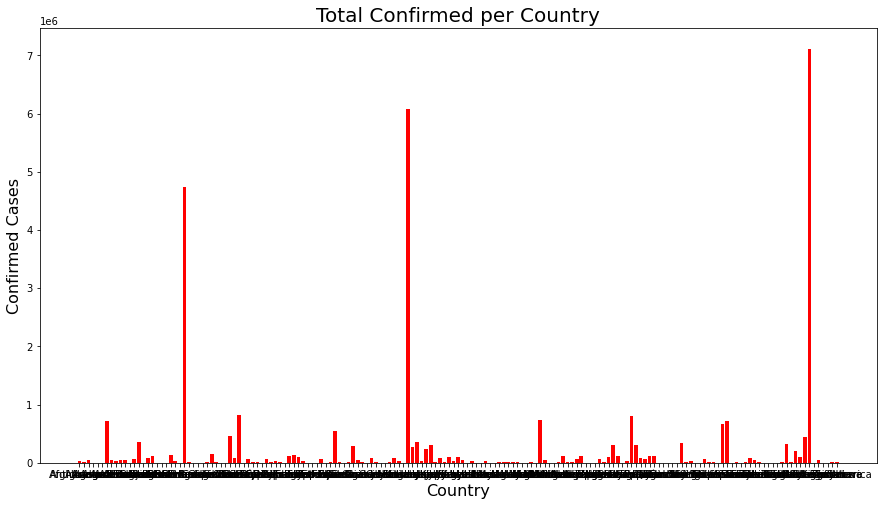

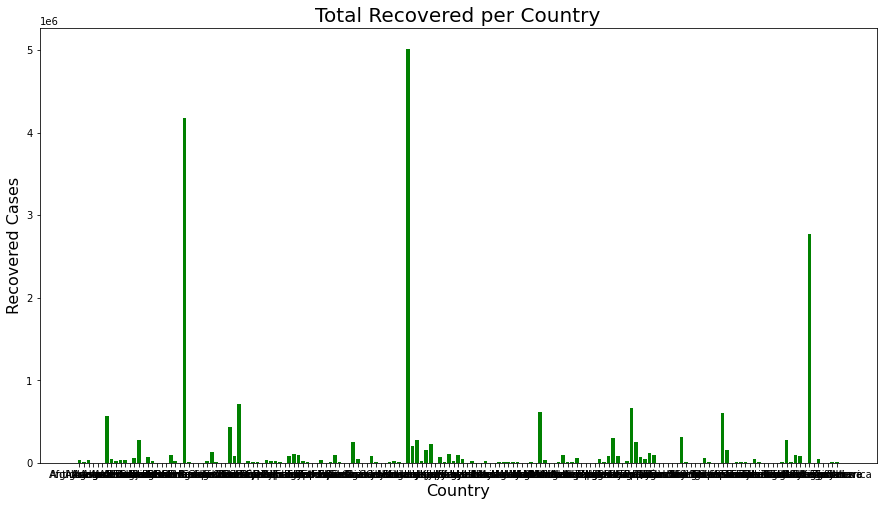

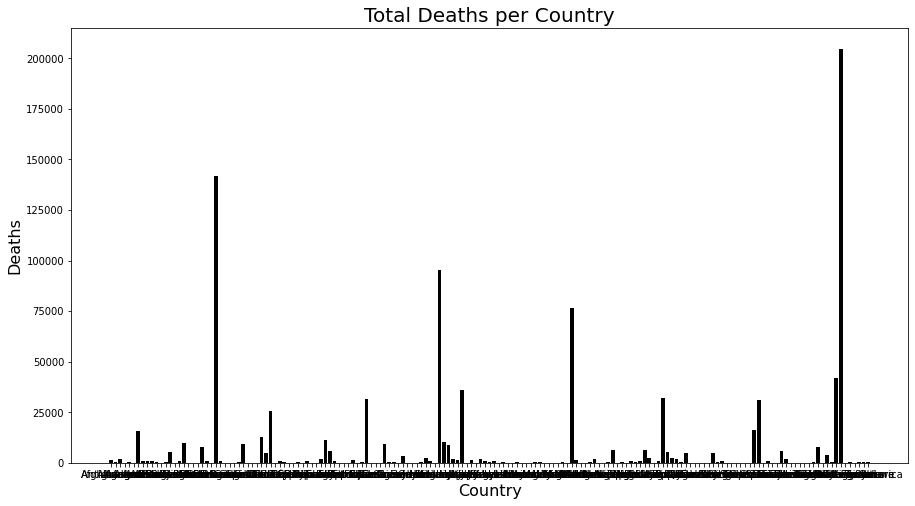

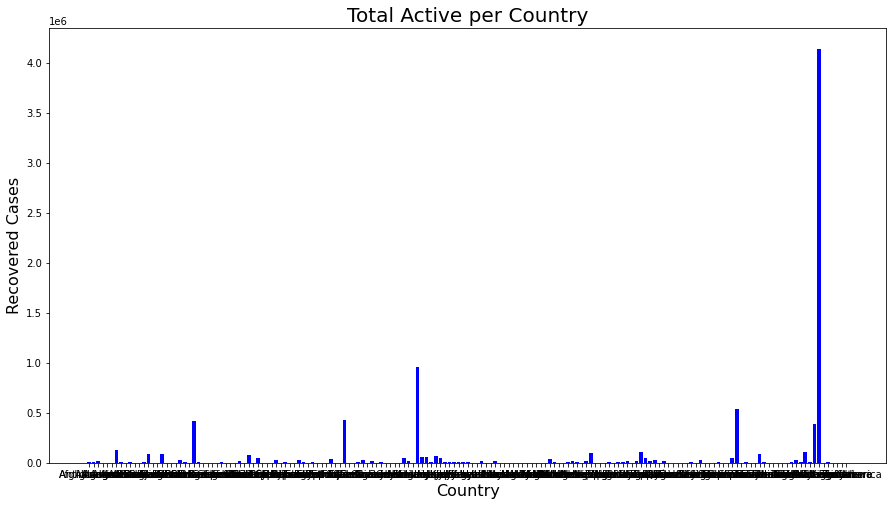

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Total Confirmed per Country", fontsize = 20)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Confirmed Cases", fontsize = 16)
plt.bar(covid_final['Country'], covid_final['TotalConfirmed'], color = 'r')
plt.show()

plt.figure(figsize=(15,8))
plt.title("Total Recovered per Country", fontsize = 20)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Recovered Cases", fontsize = 16)
plt.bar(covid_final['Country'], covid_final['TotalRecovered'], color = 'g')
plt.show()

plt.figure(figsize=(15,8))
plt.title("Total Deaths per Country", fontsize = 20)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Deaths", fontsize = 16)
plt.bar(covid_final['Country'], covid_final['TotalDeaths'], color = 'black')
plt.show()

plt.figure(figsize=(15,8))
plt.title("Total Active per Country", fontsize = 20)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Recovered Cases", fontsize = 16)
plt.bar(covid_final['Country'], active, color = 'blue')
plt.show()

In [ ]:
covid_final = covid_final.sort_values(by = ['TotalConfirmed'], ascending=False)


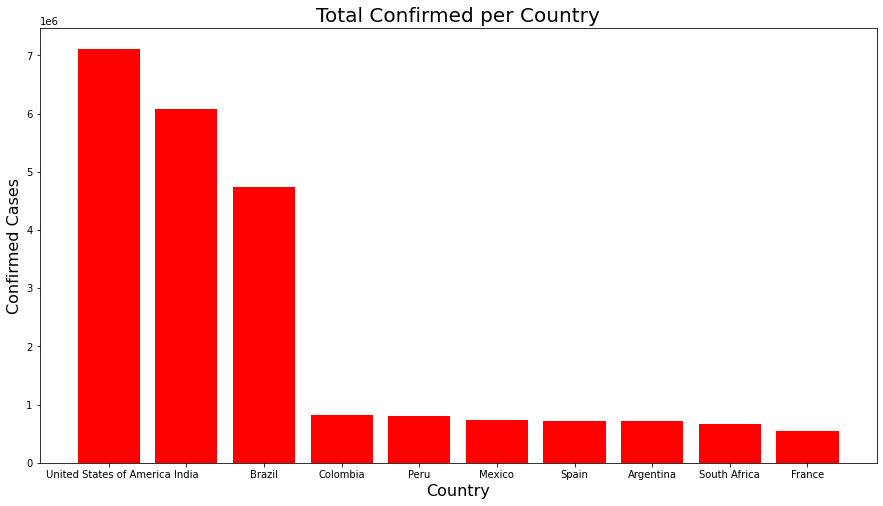

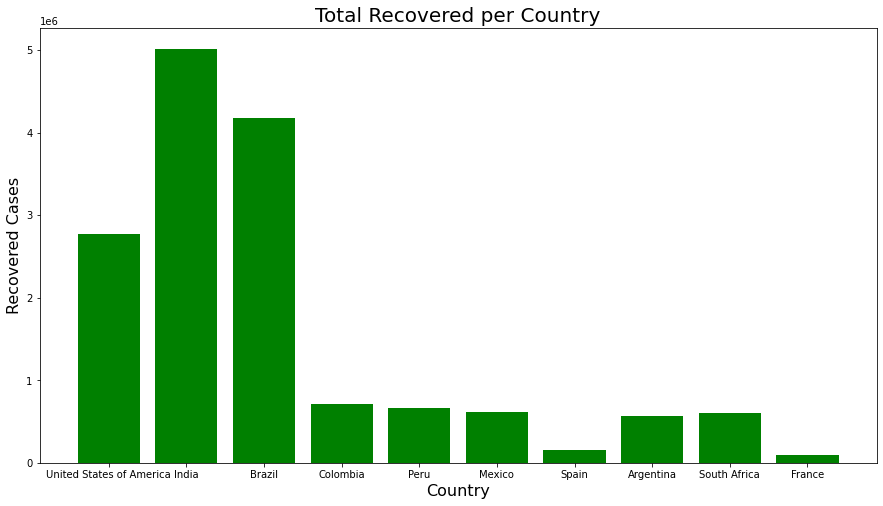

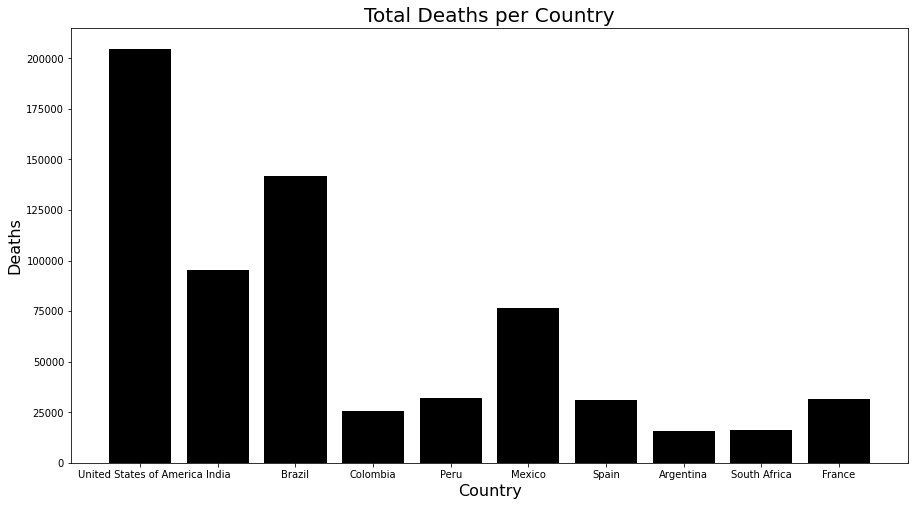

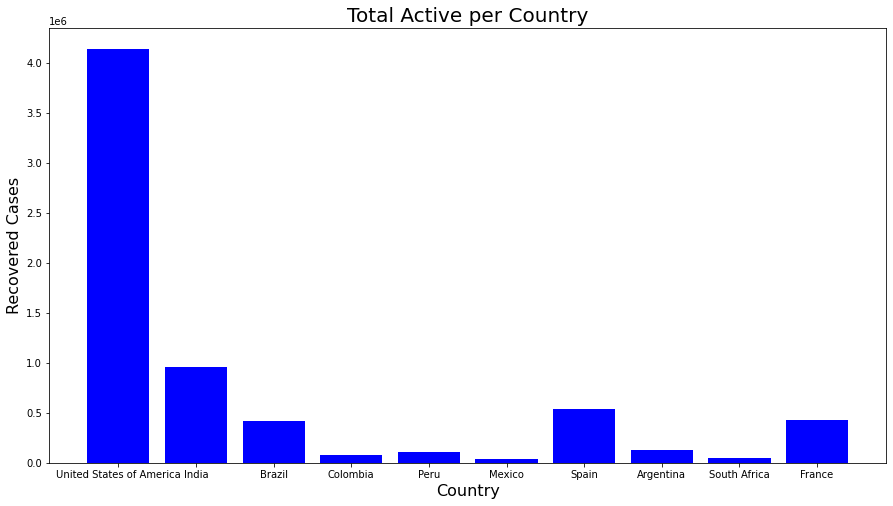

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Total Confirmed per Country", fontsize = 20)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Confirmed Cases", fontsize = 16)
plt.bar(covid_final['Country'][0:10], covid_final['TotalConfirmed'][0:10], color = 'r')
plt.show()

plt.figure(figsize=(15,8))
plt.title("Total Recovered per Country", fontsize = 20)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Recovered Cases", fontsize = 16)
plt.bar(covid_final['Country'][0:10], covid_final['TotalRecovered'][0:10], color = 'g')
plt.show()

plt.figure(figsize=(15,8))
plt.title("Total Deaths per Country", fontsize = 20)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Deaths", fontsize = 16)
plt.bar(covid_final['Country'][0:10], covid_final['TotalDeaths'][0:10], color = 'black')
plt.show()

active=(covid_final['TotalConfirmed'] - covid_final['TotalRecovered'] - covid_final['TotalDeaths']).astype(float);
plt.figure(figsize=(15,8))
plt.title("Total Active per Country", fontsize = 20)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Recovered Cases", fontsize = 16)
plt.bar(covid_final['Country'][0:10], active[0:10], color = 'blue')
plt.show()